In [ ]:
import pandas as pd
import sklearn
import pyvi
import re
from pyvi import ViTokenizer

In [ ]:
!pip install pyvi

     |████████████████████████████████| 8.5MB 6.3MB/s 
     |████████████████████████████████| 747kB 40.0MB/s 


In [ ]:
from google.colab import drive
drive.mount("mn_drive",force_remount= True)


Mounted at mn_drive


In [ ]:
dataset_train = pd.read_csv('/content/mn_drive/MyDrive/NGHIÊN CỨU KHOA HỌC/DATA/train.csv')
dataset_test = pd.read_csv('/content/mn_drive/MyDrive/NGHIÊN CỨU KHOA HỌC/DATA/test.csv')

In [ ]:
dataset_train = pd.read_csv('/content/mn_drive/MyDrive/NGHIÊN CỨU KHOA HỌC/DATA/train.csv')
dataset_train

,comment,label
0,Mua có mỗi Bingsu thập cẩm 45k mà mình f đợi h...,0
1,Thứ 6 nào ta cùng quẩy 💣 💣 💣\r\n Vuvuzela beer...,0
2,"Mình đi với nhóm , tổng cộng 4 người ăn chỉ có...",0
3,"nhân viên phục vụ không mấy tận tình , đồ ăn r...",0
4,"Vào đây thì hết bàn , nhưng mình vẫn ngồi đợi ...",0
...,...,...
39995,"Quán không gian nhỏ nhưng khá lịch sự , sạch s...",1
39996,đi ăn lần 2 : ) ) ) lần này rút kinh nghiệm ki...,1
39997,"Mình ăn 2 món , mà quên tên mất rồi , toàn từ ...",1
39998,Trong ảnh là\r\n • 1 phần mì udon xào\r\n • 1 ...,1


In [ ]:
def preprocessing(doc):
    replace_list = {
        'òa': 'oà', 'óa': 'oá', 'ỏa': 'oả', 'õa': 'oã', 'ọa': 'oạ', 'òe': 'oè', 'óe': 'oé','ỏe': 'oẻ',
        'õe': 'oẽ', 'ọe': 'oẹ', 'ùy': 'uỳ', 'úy': 'uý', 'ủy': 'uỷ', 'ũy': 'uỹ','ụy': 'uỵ', 'uả': 'ủa',
        'ả': 'ả', 'ố': 'ố', 'u´': 'ố','ỗ': 'ỗ', 'ồ': 'ồ', 'ổ': 'ổ', 'ấ': 'ấ', 'ẫ': 'ẫ', 'ẩ': 'ẩ',
        'ầ': 'ầ', 'ỏ': 'ỏ', 'ề': 'ề','ễ': 'ễ', 'ắ': 'ắ', 'ủ': 'ủ', 'ế': 'ế', 'ở': 'ở', 'ỉ': 'ỉ',
        'ẻ': 'ẻ', 'àk': u' à ','aˋ': 'à', 'iˋ': 'ì', 'ă´': 'ắ','ử': 'ử', 'e˜': 'ẽ', 'y˜': 'ỹ', 'a´': 'á',
        #Quy các icon về 2 loại emoj: Tích cực hoặc tiêu cực
        "👹": "negative", "👻": "positive", "💃": "positive",'🤙': ' positive ', '👍': ' positive ',
        "💄": "positive", "💎": "positive", "💩": "positive","😕": "negative", "😱": "negative", "😸": "positive",
        "😾": "negative", "🚫": "negative",  "🤬": "negative","🧚": "positive", "🧡": "positive",'🐶':' positive ',
        '👎': ' negative ', '😣': ' negative ','✨': ' positive ', '❣': ' positive ','☀': ' positive ',
        '♥': ' positive ', '🤩': ' positive ', 'like': ' positive ', '💌': ' positive ',
        '🤣': ' positive ', '🖤': ' positive ', '🤤': ' positive ', ':(': ' negative ', '😢': ' negative ',
        '❤': ' positive ', '😍': ' positive ', '😘': ' positive ', '😪': ' negative ', '😊': ' positive ',
        '?': ' ? ', '😁': ' positive ', '💖': ' positive ', '😟': ' negative ', '😭': ' negative ',
        '💯': ' positive ', '💗': ' positive ', '♡': ' positive ', '💜': ' positive ', '🤗': ' positive ',
        '^^': ' positive ', '😨': ' negative ', '☺': ' positive ', '💋': ' positive ', '👌': ' positive ',
        '😖': ' negative ', '😀': ' positive ', ':((': ' negative ', '😡': ' negative ', '😠': ' negative ',
        '😒': ' negative ', '🙂': ' positive ', '😏': ' negative ', '😝': ' positive ', '😄': ' positive ',
        '😙': ' positive ', '😤': ' negative ', '😎': ' positive ', '😆': ' positive ', '💚': ' positive ',
        '✌': ' positive ', '💕': ' positive ', '😞': ' negative ', '😓': ' negative ', '️🆗️': ' positive ',
        '😉': ' positive ', '😂': ' positive ', ':v': '  positive ', '=))': '  positive ', '😋': ' positive ',
        '💓': ' positive ', '😐': ' negative ', ':3': ' positive ', '😫': ' negative ', '😥': ' negative ',
        '😃': ' positive ', '😬': ' 😬 ', '😌': ' 😌 ', '💛': ' positive ', '🤝': ' positive ', '🎈': ' positive ',
        '😗': ' positive ', '🤔': ' negative ', '😑': ' negative ', '🔥': ' negative ', '🙏': ' negative ',
        '🆗': ' positive ', '😻': ' positive ', '💙': ' positive ', '💟': ' positive ',
        '😚': ' positive ', '❌': ' negative ', '👏': ' positive ', ';)': ' positive ', '<3': ' positive ',
        '🌝': ' positive ',  '🌷': ' positive ', '🌸': ' positive ', '🌺': ' positive ',
        '🌼': ' positive ', '🍓': ' positive ', '🐅': ' positive ', '🐾': ' positive ', '👉': ' positive ',
        '💐': ' positive ', '💞': ' positive ', '💥': ' positive ', '💪': ' positive ',
        '💰': ' positive ',  '😇': ' positive ', '😛': ' positive ', '😜': ' positive ',
        '🙃': ' positive ', '🤑': ' positive ', '🤪': ' positive ','☹': ' negative ',  '💀': ' negative ',
        '😔': ' negative ', '😧': ' negative ', '😩': ' negative ', '😰': ' negative ', '😳': ' negative ',
        '😵': ' negative ', '😶': ' negative ', '🙁': ' negative ',
        ':))': '  positive ', ':)': ' positive ', 'ô kêi': ' ok ', 'okie': ' ok ', ' o kê ': ' ok ',
        'okey': ' ok ', 'ôkê': ' ok ', 'oki': ' ok ', ' oke ':  ' ok ',' okay':' ok ','okê':' ok ',
        ' tks ': u' cám ơn ', 'thks': u' cám ơn ', 'thanks': u' cám ơn ', 'ths': u' cám ơn ', 'thank': u' cám ơn ',
        '⭐': 'star ', '*': 'star ', '🌟': 'star ', '🎉': u' positive ',
        'kg ': u' không ','not': u' không ', u' kg ': u' không ', '"k ': u' không ',' kh ':u' không ','kô':u' không ','hok':u' không ',' kp ': u' không phải ',u' kô ': u' không ', '"ko ': u' không ', u' ko ': u' không ', u' k ': u' không ', 'khong': u' không ', u' hok ': u' không ',
        'he he': ' positive ','hehe': ' positive ','hihi': ' positive ', 'haha': ' positive ', 'hjhj': ' positive ',
        ' lol ': ' negative ',' cc ': ' negative ','cute': u' dễ thương ','huhu': ' negative ', ' vs ': u' với ', 'wa': ' qua ', 'wá': u' quá', 'j': u' gì ', '“': ' ',
        ' sz ': u' cỡ ', 'size': u' cỡ ', u' đx ': u' được ', 'dk': u' được ', ' dc ': u' được ', 'đk': u' được ',
        'đc': u' được ','authentic': u' chuẩn chính hãng ',u' aut ': u' chuẩn chính hãng ', u' auth ': u' chuẩn chính hãng ', 'thick': u' positive ', 'store': u' cửa hàng ',
        'shop': u' cửa hàng ', 'sp': u' sản phẩm ', 'gud': u' tốt ','god': u' tốt ','wel done':' tốt ', 'good': u' tốt ', 'gút': u' tốt ',
        'sấu': u' xấu ','gut': u' tốt ', u' tot ': u' tốt ', u' nice ': u' tốt ', 'perfect': 'rất tốt', 'bt': u' bình thường ',
        'time': u' thời gian ', 'qá': u' quá ', u' ship ': u' giao hàng ', u' m ': u' mình ', u' mik ': u' mình ',
        'ể': 'ể', 'product': 'sản phẩm', 'quality': 'chất lượng','chat':' chất ', 'excelent': 'hoàn hảo', 'bad': 'tệ','fresh': ' tươi ','sad': ' tệ ',
        'date': u' hạn sử dụng ', 'hsd': u' hạn sử dụng ','quickly': u' nhanh ', 'quick': u' nhanh ','fast': u' nhanh ','delivery': u' giao hàng ',u' síp ': u' giao hàng ',
        'beautiful': u' đẹp tuyệt vời ', u' tl ': u' trả lời ', u' r ': u' rồi ', u' shopE ': u' cửa hàng ',u' order ': u' đặt hàng ',
        'chất lg': u' chất lượng ',u' sd ': u' sử dụng ',u' dt ': u' điện thoại ',u' nt ': u' nhắn tin ',u' tl ': u' trả lời ',u' sài ': u' xài ',u'bjo':u' bao giờ ',
        'thik': u' thích ',u' sop ': u' cửa hàng ', ' fb ': ' facebook ', ' face ': ' facebook ', ' very ': u' rất ',u'quả ng ':u' quảng  ',
         'dep': u' đẹp ',u' xau ': u' xấu ','delicious': u' ngon ', u'hàg': u' hàng ', u'qủa': u' quả ',
        'iu': u' yêu ','fake': u' giả mạo ', 'trl': 'trả lời', '><': u' positive ',
        ' por ': u' tệ ',' poor ': u' tệ ', 'ib':u' nhắn tin ', 'rep':u' trả lời ',u'fback':' feedback ','fedback':' feedback ',
        'bik': u'biết', 'full': 'đầy', 'free':u'miễn phí', 'hôg':u'không','wán':u'quán', 'mìh':u'mình', 'thờng':u'thường', 'hk':u'không','nhưg':u'nhưng',
        'đág':u'đáng', 'nóg':u'nóng', 'đườg':u'đường','uốg':u'uống','lạh':u'lạnh', 'zô':u'vô','nhìu':u'nhiều', 'cx':u'cũng','nchung':u'nói chung',
        'comment':u'bình luận', 'bye':u'tạm biệt','khg':u'không', 'lìn':u'negative',
        
        }

    doc = doc.lower()
    # replace words
    for k, v in replace_list.items():
        doc = doc.replace(k, v)

    # remove duplicate characters
    doc = re.sub(r'([A-Z])\1+', lambda m: m.group(1).lower(), doc, flags=re.IGNORECASE)

    # remove number, special character
    regex = "[^a-z0-9A-ZÀÁÂÃÈÉÊÌÍÒÓÔÕÙÚĂĐĨŨƠàáâãèéêìíòóôõùúăđĩũơƯĂẠẢẤẦẨẪẬẮẰẲẴẶẸẺẼỀỀỂưăạảấầẩẫậắằẳẵặẹẻẽềếểỄỆỈỊỌỎỐỒỔỖỘỚỜỞỠỢỤỦỨỪễệỉịọỏốồổỗộớờởỡợụủứừỬỮỰỲỴÝỶỸửữựỳỵỷỹ]"
    doc = re.sub(regex, " ", doc)
    doc = ViTokenizer.tokenize(doc)
    
    return doc
    

In [ ]:
print(dataset_train.iloc[1, 0])
preprocessing(dataset_train.iloc[1, 0])

Thứ 6 nào ta cùng quẩy 💣 💣 💣
 Vuvuzela beer club chung hệ thống Gogi House , Daruma , Kichi kichi nên giá cũng chưa 10% VAT . Thanh toán trước 20g hằng ngày đc giảm 30% thức ăn . Tính ra đc giảm 20% . Cũng zui ! 😊 😊 😊
 Ngồi thư giãn cũng ok . Thức ăn cũng ổn . Có mấy món nguyên liệu bên ngoài hok bik chỗ nào bán nên vô đây ăn . Cơ mà gọi mấy món đó cũng ko có hàng 😂 😂 😂
 Cháo bồ câu hình chụp nguyên con bồ câu mà tìm hoài chỉ thấy phao câu không thấy đầu bồ câu . Hỏi e nv e chạy hỏi nhà bếp đc trả lời là 1 phần cháo đc tính toán 1 lượng thịt cố định theo gram chứ không phải nguyên con chị ơi . 😅 😅 😅
 Ps : Lần sau sẽ rủ trên 4 đứa đi quẩy để đc tặng 10 ly biaaaaaaaaaaaaaa mí đc 🍺 🍺 🍺 🍺 🍺 🍺 🍺 🍺 🍺 🍺



'thứ 6 nào ta cùng quẩy vuvuzela ber club chung hệ_thống gogi house daruma kichi kichi nên giá cũng chưa 10 vat thanh_toán trước 20g hằng ngày được giảm 30 thức_ăn tính ra được giảm 20 cũng zui positive positive positive ngồi thư giãn cũng ok thức_ăn cũng ổn có mấy món nguyên_liệu bên ngoài không biết chỗ nào bán nên vô đây ăn cơ_mà gọi mấy món đó cũng không có hàng positive positive positive cháo bồ_câu hình chụp nguyên con bồ_câu mà tìm hoài chỉ thấy phao_câu không thấy đầu bồ_câu hỏi e nv e chạy hỏi nhà_bếp được trả_lời là 1 phần cháo được tính_toán 1 lượng thịt cố_định theo gram chứ không phải nguyên con chị ơi ps lần sau sẽ rủ trên 4 đứa đi quẩy để được tặng 10 ly bia mí được'

In [ ]:
dataset_train['comment'] = dataset_train['comment'].apply(preprocessing)
dataset_test['comment'] = dataset_test['comment'].apply(preprocessing)
dataset_train

,comment,label
0,mua có mỗi bingsu thập_cẩm 45k mà mình f đợi h...,0
1,thứ 6 nào ta cùng quẩy vuvuzela ber club chung...,0
2,mình đi với nhóm tổng_cộng 4 người ăn chỉ có k...,0
3,nhân_viên phục_vụ không mấy tận_tình đồ ăn ra ...,0
4,vào đây thì hết bàn nhưng mình vẫn ngồi đợi bì...,0
...,...,...
39995,quán không_gian nhỏ nhưng khá lịch_sự sạch_sẽ ...,1
39996,đi ăn lần 2 lần này rút kinh_nghiệm k yêu đồ ă...,1
39997,mình ăn 2 món mà quên tên mất rồi toàn từ cá_h...,1
39998,trong ảnh là 1 phần mì udon xào 1 phần cuốn ki...,1


In [ ]:
dataset_train.to_csv("/content/mn_drive/MyDrive/NGHIÊN CỨU KHOA HỌC/DATA/train_processed.csv", index=False)
dataset_test.to_csv("/content/mn_drive/MyDrive/NGHIÊN CỨU KHOA HỌC/DATA/test_processed.csv", index=False)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load data và chia tập TRAIN và tập TEST**

In [ ]:
import pandas as pd
import sklearn
dataset_train = pd.read_csv("/content/drive/MyDrive/NGHIÊN CỨU KHOA HỌC/DATA/train_processed.csv")
dataset_test = pd.read_csv("/content/drive/MyDrive/NGHIÊN CỨU KHOA HỌC/DATA/test_processed.csv")

X, Y = dataset_train['comment'], dataset_train['label']
X_test, Y_test = dataset_test['comment'], dataset_test['label']
print(X.shape)
print(X_test.shape)

(40000,)
(10000,)


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/NGHIÊN CỨU KHOA HỌC/DATA/train_processed.csv')
df_test = pd.read_csv('/content/drive/MyDrive/NGHIÊN CỨU KHOA HỌC/DATA/test_processed.csv')
X_train = df_train['comment']
y_train = df_train['label'].values
X_test = df_test['comment']
y_test = df_test['label'].values
print('Training samples:',X_train.shape)
print(y_train.shape)
print('Testing samples:',X_test.shape)
print(y_test.shape)
data = X_train.tolist()
data.extend(X_test.tolist())
print(len(data))

Training samples: (40000,)
(40000,)
Testing samples: (10000,)
(10000,)
50000


**Trích xuất đặc trưng bằng BOW và phân lớp RANDOM FOREST**

In [ ]:
#Bow - Random Forest : base line
count_vec = CountVectorizer()
pipeline = Pipeline(steps=[('vec', CountVectorizer()), ('clf', RandomForestClassifier())], verbose=True)
pipeline.fit(X_train, y_train)
Y_pred = pipeline.predict(X_test)
print(classification_report(y_test, Y_pred, digits=4))

[Pipeline] ............... (step 1 of 2) Processing vec, total=   2.9s
[Pipeline] ............... (step 2 of 2) Processing clf, total= 2.0min
              precision    recall  f1-score   support

           0     0.8587    0.8810    0.8697      5000
           1     0.8778    0.8550    0.8663      5000

    accuracy                         0.8680     10000
   macro avg     0.8682    0.8680    0.8680     10000
weighted avg     0.8682    0.8680    0.8680     10000



**SAVE  model bằng Pickle**

In [ ]:
import pickle
from sklearn import metrics 
filename = '/content/drive/MyDrive/NGHIÊN CỨU KHOA HỌC/DATA/bow_randomforest.sav'
pickle.dump(pipeline, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
# y_pred = loaded_model.predict(X_test_new)
print("Accuracy: ", 100*metrics.accuracy_score(y_test, Y_pred))

Accuracy:  86.8


**Trích xuất đặc trưng bằng TFIDF và phân lớp RANDOM FOREST**



In [ ]:
#TFIDF - RandomForest : Base line

# max_df: means "ignore terms that appear in more than 50% of the documents".
# min_df:  means "ignore terms that appear in less than 5 documents".
pipeline = Pipeline(steps=[('vec', CountVectorizer()), 
                           ('tfidf', TfidfTransformer()),
                           ('clf', RandomForestClassifier())],
                             verbose=True
                    )

pipeline.fit(X_train, y_train)
Y_pred = pipeline.predict(X_test)
print(classification_report(y_test, Y_pred, digits=4))

[Pipeline] ............... (step 1 of 3) Processing vec, total=   2.6s
[Pipeline] ............. (step 2 of 3) Processing tfidf, total=   0.2s
[Pipeline] ............... (step 3 of 3) Processing clf, total= 1.5min
              precision    recall  f1-score   support

           0     0.8625    0.8720    0.8672      5000
           1     0.8706    0.8610    0.8658      5000

    accuracy                         0.8665     10000
   macro avg     0.8665    0.8665    0.8665     10000
weighted avg     0.8665    0.8665    0.8665     10000



**Save model bằng PICKLE**

In [ ]:
filename = '/content/mn_drive/MyDrive/NGHIÊN CỨU KHOA HỌC/DATA/tfidf_randomforest.sav'
pickle.dump(pipeline, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
# y_pred = loaded_model.predict(X_test_new)
print("Accuracy: ", 100*metrics.accuracy_score(y_test, Y_pred))

Accuracy:  86.65


**FINE-TURNING** tinh chỉnh

**BOW - Random Forest - Optimal**

In [ ]:
pipeline = Pipeline(steps=[('vec', CountVectorizer(ngram_range=(1,5),stop_words=None,max_df=0.5, min_df=5, )),
                           ('clf', RandomForestClassifier())], verbose=True)
pipeline.fit(X_train, y_train)
Y_pred = pipeline.predict(X_test)
print(classification_report(y_test, Y_pred, digits=4))

[Pipeline] ............... (step 1 of 2) Processing vec, total= 1.2min
[Pipeline] ............... (step 2 of 2) Processing clf, total= 3.8min
              precision    recall  f1-score   support

           0     0.8826    0.8750    0.8788      5000
           1     0.8761    0.8836    0.8798      5000

    accuracy                         0.8793     10000
   macro avg     0.8793    0.8793    0.8793     10000
weighted avg     0.8793    0.8793    0.8793     10000



**Save model bằng PICKLE**

In [ ]:
filename = '/content/mn_drive/MyDrive/NGHIÊN CỨU KHOA HỌC/DATA/bow_randomforest_optimal.sav'
pickle.dump(pipeline, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
# y_pred = loaded_model.predict(X_test_new)
print("Accuracy: ", 100*metrics.accuracy_score(y_test, Y_pred))

Accuracy:  87.92999999999999


**TFIDF - Random Forest - Optimal**

In [ ]:
pipeline = Pipeline(steps=[('vec', CountVectorizer(ngram_range=(1,5),stop_words=None,max_df=0.5, min_df=5, )), 
                           ('tfidf', TfidfTransformer(use_idf=True, sublinear_tf = True,norm='l2',smooth_idf=True)),
                           ('clf', RandomForestClassifier(n_estimators=150))],
                             verbose=True
                    )

pipeline.fit(X_train, y_train)
Y_pred = pipeline.predict(X_test)
print(classification_report(y_test, Y_pred, digits=4))

[Pipeline] ............... (step 1 of 3) Processing vec, total= 1.3min
[Pipeline] ............. (step 2 of 3) Processing tfidf, total=   0.5s
[Pipeline] ............... (step 3 of 3) Processing clf, total= 4.7min
              precision    recall  f1-score   support

           0     0.8904    0.8742    0.8822      5000
           1     0.8764    0.8924    0.8844      5000

    accuracy                         0.8833     10000
   macro avg     0.8834    0.8833    0.8833     10000
weighted avg     0.8834    0.8833    0.8833     10000



**Save model bằng PICKLE**

In [ ]:
filename = '/content/mn_drive/MyDrive/NGHIÊN CỨU KHOA HỌC/DATA/tfidf_randomforest_optimal.sav'
pickle.dump(pipeline, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
# y_pred = loaded_model.predict(X_test_new)
print("Accuracy: ", 100*metrics.accuracy_score(y_test, Y_pred))

Accuracy:  88.33


**RESULT VISUALIZE** Biểu diễn kết quả model

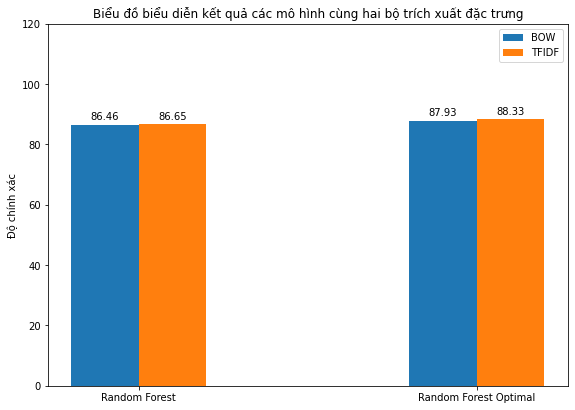

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

labels = ['Random Forest', 'Random Forest Optimal','Ensemble']
bow = [ 86.46, 87.93]
tfidf = [86.65, 88.33]
x = np.arange(len(labels))[:-1]  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(8,5.8))
rects1 = ax.bar(x - width/2, bow, width, label='BOW')
rects2 = ax.bar(x + width/2, tfidf, width, label='TFIDF')
# recs3  = ax.bar(x[-1] +1, 90.58, width)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Độ chính xác')
ax.set_title('Biểu đồ biểu diễn kết quả các mô hình cùng hai bộ trích xuất đặc trưng')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.ylim(0,120)
plt.show()

In [ ]:
#  Ensemble Stacking: LinearSVC, RandomForest
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
estimators=[
                              ('nv', MultinomialNB(alpha=0.1)), 
                              ('rfc', RandomForestClassifier(n_estimators=300)),
                              ('svc',LinearSVC(C=1, verbose=True))
                              ]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(), stack_method='predict', verbose=True, n_jobs=-1
)


pipeline = Pipeline(steps=[('vec', CountVectorizer(ngram_range=(1,5),stop_words=None, min_df=5)), 
                           ('tfidf', TfidfTransformer(use_idf=True, sublinear_tf = True,norm='l2',smooth_idf=True)),
                        ('clf', clf)],
                             verbose=True
                    )



pipeline.fit(X, Y)
Y_pred = pipeline.predict(X_test)
print(classification_report(Y_test, Y_pred, digits=6))

[Pipeline] ............... (step 1 of 3) Processing vec, total= 1.2min
[Pipeline] ............. (step 2 of 3) Processing tfidf, total=   0.6s
[Pipeline] ............... (step 3 of 3) Processing clf, total=36.5min
              precision    recall  f1-score   support

           0   0.921622  0.886600  0.903772      5000
           1   0.890751  0.924600  0.907360      5000

    accuracy                       0.905600     10000
   macro avg   0.906187  0.905600  0.905566     10000
weighted avg   0.906187  0.905600  0.905566     10000



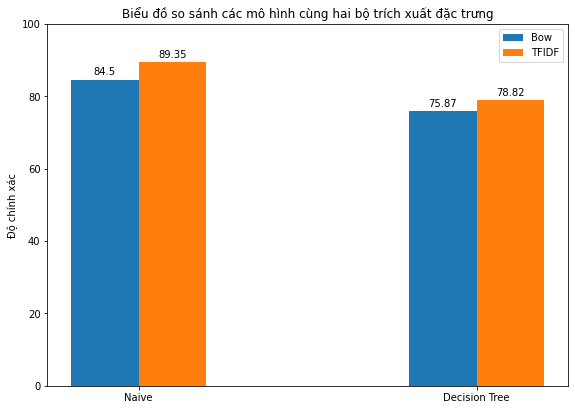

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

labels = ['Naive', 'Decision Tree','Ensemble']
bow = [ 84.5, 75.87]
tfidf = [89.35, 78.82]
x = np.arange(len(labels))[:-1]  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(8,5.8))
rects1 = ax.bar(x - width/2, bow, width, label='Bow')
rects2 = ax.bar(x + width/2, tfidf, width, label='TFIDF')

# recs3  = ax.bar(x[-1] +1, 90.58, width)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Độ chính xác')
ax.set_title('Biểu đồ so sánh các mô hình cùng hai bộ trích xuất đặc trưng')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.ylim(0,100)
plt.show()